In [110]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sklearn
import imblearn

import importlib
import Projet7_utils as utils
importlib.reload(utils)

<module 'Projet7_utils' from 'e:\\Git\\OpenClassrooms_Projet7\\Projet7_utils.py'>

In [111]:
#import threadpoolctl

In [112]:
#! conda update threadpoolctl

In [113]:
PATH = "E:/OpenClassrooms/Projet7/Data"

df = pd.read_csv(os.path.join(PATH, "application_train.csv"))
df_test = pd.read_csv(os.path.join(PATH, "application_test.csv"))

In [114]:
df['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [115]:
importlib.reload(utils)

utils.diff_lists(df.columns.tolist(), df_test.columns.tolist())[0]

['TARGET']

In [116]:
df.columns.tolist()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

## Cleaning, feature engineering

In [117]:
to_drop = [
    'NAME_TYPE_SUITE',
    'WEEKDAY_APPR_PROCESS_START',
    'HOUR_APPR_PROCESS_START',
    'OWN_CAR_AGE',
    'NAME_TYPE_SUITE',
    'DAYS_REGISTRATION',
    'DAYS_ID_PUBLISH',
    'OWN_CAR_AGE',
    'FLAG_EMP_PHONE',
    'FLAG_WORK_PHONE',
    'FLAG_CONT_MOBILE',
    'FLAG_PHONE',
    'REG_REGION_NOT_LIVE_REGION',
    'REG_REGION_NOT_WORK_REGION',
    'LIVE_REGION_NOT_WORK_REGION',
    'REG_CITY_NOT_LIVE_CITY',
    'REG_CITY_NOT_WORK_CITY',
    'LIVE_CITY_NOT_WORK_CITY',
    'OBS_30_CNT_SOCIAL_CIRCLE',
    'DEF_30_CNT_SOCIAL_CIRCLE',
    'OBS_60_CNT_SOCIAL_CIRCLE',
    'DEF_60_CNT_SOCIAL_CIRCLE',
    'DAYS_LAST_PHONE_CHANGE',
    'AMT_REQ_CREDIT_BUREAU_HOUR',
    'AMT_REQ_CREDIT_BUREAU_DAY',
    'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_QRT',
    'AMT_REQ_CREDIT_BUREAU_YEAR',
    'EXT_SOURCE_1',
    'EXT_SOURCE_2',
    'EXT_SOURCE_3',
    'OCCUPATION_TYPE'
]

df = df.drop(to_drop, axis=1)
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,0,0,0,0,0,0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,0,0,0,0,0,0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,0,0,0,0,0,0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
maybe_drop = [
    'REGION_RATING_CLIENT',
    'REGION_RATING_CLIENT_W_CITY',
    'REGION_POPULATION_RELATIVE',
    'FLAG_DOCUMENT_2',
    'FLAG_DOCUMENT_3',
    'FLAG_DOCUMENT_4',
    'FLAG_DOCUMENT_5',
    'FLAG_DOCUMENT_6',
    'FLAG_DOCUMENT_7',
    'FLAG_DOCUMENT_8',
    'FLAG_DOCUMENT_9',
    'FLAG_DOCUMENT_10',
    'FLAG_DOCUMENT_11',
    'FLAG_DOCUMENT_12',
    'FLAG_DOCUMENT_13',
    'FLAG_DOCUMENT_14',
    'FLAG_DOCUMENT_15',
    'FLAG_DOCUMENT_16',
    'FLAG_DOCUMENT_17',
    'FLAG_DOCUMENT_18',
    'FLAG_DOCUMENT_19',
    'FLAG_DOCUMENT_20',
    'FLAG_DOCUMENT_21',
    'APARTMENTS_AVG',
    'BASEMENTAREA_AVG',
    'YEARS_BEGINEXPLUATATION_AVG',
    'YEARS_BUILD_AVG',
    'COMMONAREA_AVG',
    'ELEVATORS_AVG',
    'ENTRANCES_AVG',
    'FLOORSMAX_AVG',
    'FLOORSMIN_AVG',
    'LANDAREA_AVG',
    'LIVINGAPARTMENTS_AVG',
    'LIVINGAREA_AVG',
    'NONLIVINGAPARTMENTS_AVG',
    'NONLIVINGAREA_AVG',
    'APARTMENTS_MODE',
    'BASEMENTAREA_MODE',
    'YEARS_BEGINEXPLUATATION_MODE',
    'YEARS_BUILD_MODE',
    'COMMONAREA_MODE',
    'ELEVATORS_MODE',
    'ENTRANCES_MODE',
    'FLOORSMAX_MODE',
    'FLOORSMIN_MODE',
    'LANDAREA_MODE',
    'LIVINGAPARTMENTS_MODE',
    'LIVINGAREA_MODE',
    'NONLIVINGAPARTMENTS_MODE',
    'NONLIVINGAREA_MODE',
    'APARTMENTS_MEDI',
    'BASEMENTAREA_MEDI',
    'YEARS_BEGINEXPLUATATION_MEDI',
    'YEARS_BUILD_MEDI',
    'COMMONAREA_MEDI',
    'ELEVATORS_MEDI',
    'ENTRANCES_MEDI',
    'FLOORSMAX_MEDI',
    'FLOORSMIN_MEDI',
    'LANDAREA_MEDI',
    'LIVINGAPARTMENTS_MEDI',
    'LIVINGAREA_MEDI',
    'NONLIVINGAPARTMENTS_MEDI',
    'NONLIVINGAREA_MEDI',
    'TOTALAREA_MODE',
    'FONDKAPREMONT_MODE',
    'WALLSMATERIAL_MODE',
    'HOUSETYPE_MODE'    
]

df = df.drop(maybe_drop, axis=1)
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_EMAIL,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,EMERGENCYSTATE_MODE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,1,0,1.0,Business Entity Type 3,No
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Higher education,Married,House / apartment,-16765,-1188,1,0,2.0,School,No
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,1,0,1.0,Government,NaN
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,1,0,2.0,Business Entity Type 3,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,1,0,1.0,Religion,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,Secondary / secondary special,Separated,With parents,-9327,-236,1,0,1.0,Services,No
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,Secondary / secondary special,Widow,House / apartment,-20775,365243,1,0,1.0,XNA,No
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,Higher education,Separated,House / apartment,-14966,-7921,1,1,1.0,School,No
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,Secondary / secondary special,Married,House / apartment,-11961,-4786,1,0,2.0,Business Entity Type 1,No


In [119]:
ind = df.loc[df['AMT_ANNUITY'].isna()].index
df = df.drop(ind, axis=0)

ind = df.loc[df['CNT_FAM_MEMBERS'].isna()].index
df = df.drop(ind, axis=0)

ind = df.loc[df['AMT_GOODS_PRICE'].isna()].index
df = df.drop(ind, axis=0)

In [120]:
df['INCOME_CREDIT_RATE'] = df['AMT_INCOME_TOTAL'] / df['AMT_CREDIT']
df['ANNUITY_INCOME_RATE'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
df['PAYMENT_RATE'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']

In [121]:
df['CODE_GENDER'].unique()

array(['M', 'F', 'XNA'], dtype=object)

In [122]:
ind = df.loc[df['CODE_GENDER']=='XNA'].index

df = df.drop(ind, axis=0)

In [123]:
importlib.reload(utils)

list_cat_to_binary = [
    'NAME_CONTRACT_TYPE',
    'CODE_GENDER',
    'FLAG_OWN_CAR',
    'FLAG_OWN_REALTY',
    'EMERGENCYSTATE_MODE'
]

for i in list_cat_to_binary:
    df[i] = utils.cat_to_binary(df[i])

In [124]:
df = df.set_index('SK_ID_CURR')

In [125]:
df.isnull().sum().sort_values(ascending=False).head()

TARGET                 0
NAME_CONTRACT_TYPE     0
ANNUITY_INCOME_RATE    0
INCOME_CREDIT_RATE     0
EMERGENCYSTATE_MODE    0
dtype: int64

In [126]:
df

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_EMAIL,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,EMERGENCYSTATE_MODE,INCOME_CREDIT_RATE,ANNUITY_INCOME_RATE,PAYMENT_RATE
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,0,0,0,0,0,202500.0,406597.5,24700.5,351000.0,...,-9461,-637,1,0,1.0,Business Entity Type 3,0,0.498036,0.121978,0.060749
100003,0,0,1,0,1,0,270000.0,1293502.5,35698.5,1129500.0,...,-16765,-1188,1,0,2.0,School,0,0.208736,0.132217,0.027598
100004,0,1,0,1,0,0,67500.0,135000.0,6750.0,135000.0,...,-19046,-225,1,0,1.0,Government,1,0.500000,0.100000,0.050000
100006,0,0,1,0,0,0,135000.0,312682.5,29686.5,297000.0,...,-19005,-3039,1,0,2.0,Business Entity Type 3,1,0.431748,0.219900,0.094941
100007,0,0,0,0,0,0,121500.0,513000.0,21865.5,513000.0,...,-19932,-3038,1,0,1.0,Religion,1,0.236842,0.179963,0.042623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456251,0,0,0,0,1,0,157500.0,254700.0,27558.0,225000.0,...,-9327,-236,1,0,1.0,Services,0,0.618375,0.174971,0.108198
456252,0,0,1,0,0,0,72000.0,269550.0,12001.5,225000.0,...,-20775,365243,1,0,1.0,XNA,0,0.267112,0.166687,0.044524
456253,0,0,1,0,0,0,153000.0,677664.0,29979.0,585000.0,...,-14966,-7921,1,1,1.0,School,0,0.225776,0.195941,0.044239


In [127]:
df.loc[df['DAYS_EMPLOYED']==365243]

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_EMAIL,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,EMERGENCYSTATE_MODE,INCOME_CREDIT_RATE,ANNUITY_INCOME_RATE,PAYMENT_RATE
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100011,0,0,1,0,0,0,112500.000,1019610.0,33826.5,913500.0,...,-20099,365243,1,0,2.0,XNA,1,0.110336,0.300680,0.033176
100015,0,0,1,0,0,0,38419.155,148365.0,10678.5,135000.0,...,-20417,365243,1,0,2.0,XNA,1,0.258950,0.277947,0.071975
100027,0,0,1,0,0,0,83250.000,239850.0,23850.0,225000.0,...,-24827,365243,1,0,2.0,XNA,0,0.347092,0.286486,0.099437
100045,0,0,1,0,0,0,99000.000,247275.0,17338.5,225000.0,...,-23920,365243,1,0,2.0,XNA,0,0.400364,0.175136,0.070118
100050,0,0,1,0,0,0,108000.000,746280.0,42970.5,675000.0,...,-23548,365243,1,0,1.0,XNA,0,0.144718,0.397875,0.057580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456209,0,0,1,0,0,0,202500.000,703728.0,29943.0,607500.0,...,-22414,365243,1,0,1.0,XNA,0,0.287753,0.147867,0.042549
456227,0,0,1,0,0,0,99000.000,247275.0,16479.0,225000.0,...,-24911,365243,1,0,1.0,XNA,0,0.400364,0.166455,0.066642
456231,0,0,0,0,0,0,117000.000,1071909.0,31473.0,936000.0,...,-23125,365243,1,0,2.0,XNA,1,0.109151,0.269000,0.029362


In [128]:
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].replace(365243, np.nan)
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].fillna(df['DAYS_EMPLOYED'].mean())

In [129]:
df.isnull().sum().sort_values(ascending=False).head()

TARGET                 0
NAME_CONTRACT_TYPE     0
ANNUITY_INCOME_RATE    0
INCOME_CREDIT_RATE     0
EMERGENCYSTATE_MODE    0
dtype: int64

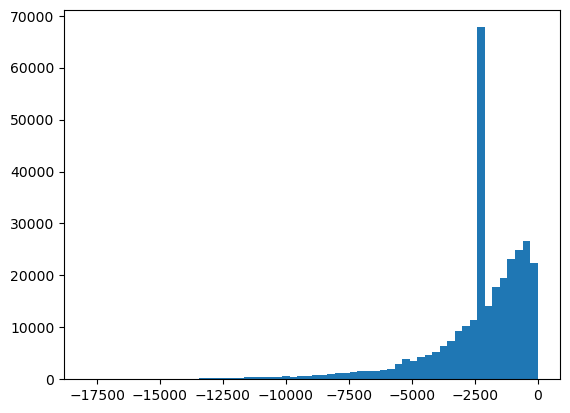

In [130]:
plt.hist(df['DAYS_EMPLOYED'], bins=60)
plt.show()

In [131]:
df

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_EMAIL,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,EMERGENCYSTATE_MODE,INCOME_CREDIT_RATE,ANNUITY_INCOME_RATE,PAYMENT_RATE
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,0,0,0,0,0,202500.0,406597.5,24700.5,351000.0,...,-9461,-637.000000,1,0,1.0,Business Entity Type 3,0,0.498036,0.121978,0.060749
100003,0,0,1,0,1,0,270000.0,1293502.5,35698.5,1129500.0,...,-16765,-1188.000000,1,0,2.0,School,0,0.208736,0.132217,0.027598
100004,0,1,0,1,0,0,67500.0,135000.0,6750.0,135000.0,...,-19046,-225.000000,1,0,1.0,Government,1,0.500000,0.100000,0.050000
100006,0,0,1,0,0,0,135000.0,312682.5,29686.5,297000.0,...,-19005,-3039.000000,1,0,2.0,Business Entity Type 3,1,0.431748,0.219900,0.094941
100007,0,0,0,0,0,0,121500.0,513000.0,21865.5,513000.0,...,-19932,-3038.000000,1,0,1.0,Religion,1,0.236842,0.179963,0.042623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456251,0,0,0,0,1,0,157500.0,254700.0,27558.0,225000.0,...,-9327,-236.000000,1,0,1.0,Services,0,0.618375,0.174971,0.108198
456252,0,0,1,0,0,0,72000.0,269550.0,12001.5,225000.0,...,-20775,-2384.280662,1,0,1.0,XNA,0,0.267112,0.166687,0.044524
456253,0,0,1,0,0,0,153000.0,677664.0,29979.0,585000.0,...,-14966,-7921.000000,1,1,1.0,School,0,0.225776,0.195941,0.044239


# Preprocess data

In [132]:
# split data and target
X = df.drop('TARGET', axis=1)
y = df['TARGET']

In [133]:
list_cat_other = [i for i in df.columns.tolist() if df[i].dtypes=='O' and i not in list_cat_to_binary]
list_cat_other

['NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'ORGANIZATION_TYPE']

In [134]:
importlib.reload(utils)

X_train, X_test, y_train, y_test = utils.preprocess_data(X, y, list_cat_other)

e:\Anaconda\envs\projet7\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(


In [135]:
X_train

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,...,ORGANIZATION_TYPE:Legal Services,ORGANIZATION_TYPE:Advertising,ORGANIZATION_TYPE:Trade: type 5,ORGANIZATION_TYPE:Cleaning,ORGANIZATION_TYPE:Industry: type 13,ORGANIZATION_TYPE:Trade: type 4,ORGANIZATION_TYPE:Telecom,ORGANIZATION_TYPE:Industry: type 8,ORGANIZATION_TYPE:Realtor,ORGANIZATION_TYPE:Industry: type 6
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
344601,-0.322625,-1.388347,1.392287,-0.664207,2.198687,0.726414,0.626889,0.628142,0.405524,-0.292121,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
209799,3.099577,-1.388347,-0.718243,-0.664207,0.810073,-0.721035,-1.042163,-1.251859,-0.970519,0.057225,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
302140,-0.322625,0.720281,-0.718243,-0.664207,-0.578542,-0.100700,0.654548,0.651755,0.429879,-0.389250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
135697,3.099577,0.720281,1.392287,-0.664207,0.810073,-0.100700,-1.153915,-1.407205,-1.092293,1.851598,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
420325,-0.322625,-1.388347,-0.718243,-0.664207,3.587302,-0.307478,-0.930410,-0.644455,-0.848746,0.919248,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239135,3.099577,0.720281,1.392287,-0.664207,-0.578542,2.587419,0.187111,0.456951,0.368992,0.604723,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
400217,-0.322625,0.720281,-0.718243,1.505554,-0.578542,-0.100700,-0.064633,-0.293683,-0.203345,-1.541516,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
253147,3.099577,0.720281,-0.718243,-0.664207,-0.578542,-0.390189,-1.042163,-1.251859,-0.970519,-0.912008,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [136]:
y_train

SK_ID_CURR
344601    0
209799    1
302140    0
135697    1
420325    0
         ..
239135    0
400217    0
253147    0
270434    0
241526    0
Name: TARGET, Length: 245773, dtype: int64

In [137]:
X_test

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,...,ORGANIZATION_TYPE:Legal Services,ORGANIZATION_TYPE:Advertising,ORGANIZATION_TYPE:Trade: type 5,ORGANIZATION_TYPE:Cleaning,ORGANIZATION_TYPE:Industry: type 13,ORGANIZATION_TYPE:Trade: type 4,ORGANIZATION_TYPE:Telecom,ORGANIZATION_TYPE:Industry: type 8,ORGANIZATION_TYPE:Realtor,ORGANIZATION_TYPE:Industry: type 6
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
122252,-0.322625,0.720281,-0.718243,1.505554,0.810073,-0.100700,0.100391,0.285138,-0.239877,0.479875,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
353683,-0.322625,0.720281,-0.718243,1.505554,-0.578542,-0.390189,1.863393,1.375669,2.195599,0.622362,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
280711,-0.322625,-1.388347,-0.718243,-0.664207,-0.578542,2.587419,-0.253639,-0.119384,-0.239877,1.002633,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
207605,-0.322625,0.720281,-0.718243,-0.664207,-0.578542,-0.514256,-1.333165,-1.655759,-1.335841,-0.351681,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
380918,-0.322625,0.720281,-0.718243,-0.664207,-0.578542,-0.307478,0.866519,0.050565,0.381169,-0.327399,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336384,-0.322625,0.720281,-0.718243,-0.664207,0.810073,-0.183411,-0.176374,-0.317917,-0.178990,-0.454537,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
307692,-0.322625,0.720281,-0.718243,-0.664207,-0.578542,0.726414,1.304633,1.426623,1.586730,-1.258833,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.60134
311656,-0.322625,-1.388347,-0.718243,-0.664207,-0.578542,0.519635,-0.194634,0.561343,-0.239877,0.007744,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000


# Dummy classifier

In [138]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_auc_score

dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train, y_train)

dummy_predict = dummy_clf.predict(X_test.values)
print("Accuracy: ", dummy_clf.score(dummy_predict, y_test))
print("AUROC: ", roc_auc_score(y_test, dummy_predict))

Accuracy:  0.9201061128832758
AUROC:  0.5


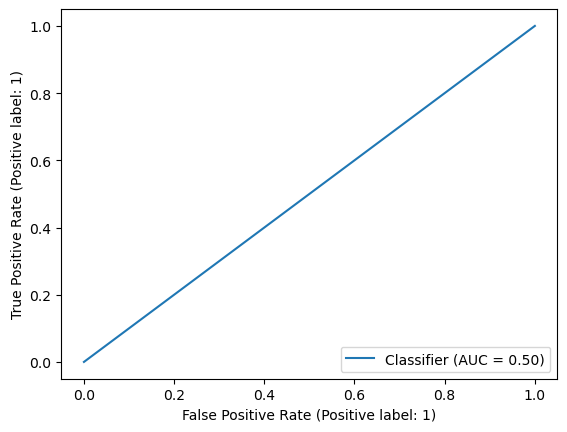

In [139]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, dummy_predict)

# Logistic regression

In [140]:
X_train

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,...,ORGANIZATION_TYPE:Legal Services,ORGANIZATION_TYPE:Advertising,ORGANIZATION_TYPE:Trade: type 5,ORGANIZATION_TYPE:Cleaning,ORGANIZATION_TYPE:Industry: type 13,ORGANIZATION_TYPE:Trade: type 4,ORGANIZATION_TYPE:Telecom,ORGANIZATION_TYPE:Industry: type 8,ORGANIZATION_TYPE:Realtor,ORGANIZATION_TYPE:Industry: type 6
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
344601,-0.322625,-1.388347,1.392287,-0.664207,2.198687,0.726414,0.626889,0.628142,0.405524,-0.292121,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
209799,3.099577,-1.388347,-0.718243,-0.664207,0.810073,-0.721035,-1.042163,-1.251859,-0.970519,0.057225,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
302140,-0.322625,0.720281,-0.718243,-0.664207,-0.578542,-0.100700,0.654548,0.651755,0.429879,-0.389250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
135697,3.099577,0.720281,1.392287,-0.664207,0.810073,-0.100700,-1.153915,-1.407205,-1.092293,1.851598,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
420325,-0.322625,-1.388347,-0.718243,-0.664207,3.587302,-0.307478,-0.930410,-0.644455,-0.848746,0.919248,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239135,3.099577,0.720281,1.392287,-0.664207,-0.578542,2.587419,0.187111,0.456951,0.368992,0.604723,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
400217,-0.322625,0.720281,-0.718243,1.505554,-0.578542,-0.100700,-0.064633,-0.293683,-0.203345,-1.541516,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
253147,3.099577,0.720281,-0.718243,-0.664207,-0.578542,-0.390189,-1.042163,-1.251859,-0.970519,-0.912008,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
"""from imblearn.pipeline import Pipeline as imbpipe
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

#smote = SMOTE(random_state=42)
#X_train_smote, y_train_smote = smote.fit_resample(X_train.values, y_train.ravel())

model_smote = imbpipe(steps=[
    ('sampling', SMOTE()),
    ('classification', LogisticRegression())
    ])

par_grid = {
    'classification__tol': np.logspace(-5, -2, 4),
    'classification__C': np.linspace(0.1, 10, 5),
    'classification__max_iter': [50, 100, 200]
}

LogReg_smote = GridSearchCV(
    model_smote,
    param_grid=par_grid,
    scoring='roc_auc',
    verbose=1,
    n_jobs=4
    )

LogReg_smote.fit(X_train, y_train)

print('Best hyperparams: ', LogReg_smote.best_params_)
print('Best mean score: ', LogReg_smote.best_score_)
print('std: ', LogReg_smote.cv_results_['std_test_score'][LogReg_smote.best_index_])

LogReg_predict = LogReg_smote.predict(X_test)"""



"from imblearn.pipeline import Pipeline as imbpipe\nfrom imblearn.over_sampling import SMOTE\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.model_selection import GridSearchCV\n\n#smote = SMOTE(random_state=42)\n#X_train_smote, y_train_smote = smote.fit_resample(X_train.values, y_train.ravel())\n\nmodel_smote = imbpipe(steps=[\n    ('sampling', SMOTE()),\n    ('classification', LogisticRegression())\n    ])\n\npar_grid = {\n    'classification__tol': np.logspace(-5, -2, 4),\n    'classification__C': np.linspace(0.1, 10, 5),\n    'classification__max_iter': [50, 100, 200]\n}\n\nLogReg_smote = GridSearchCV(\n    model_smote,\n    param_grid=par_grid,\n    scoring='roc_auc',\n    verbose=1,\n    n_jobs=4\n    )\n\nLogReg_smote.fit(X_train, y_train)\n\nprint('Best hyperparams: ', LogReg_smote.best_params_)\nprint('Best mean score: ', LogReg_smote.best_score_)\nprint('std: ', LogReg_smote.cv_results_['std_test_score'][LogReg_smote.best_index_])\n\nLogReg_predict = LogReg

In [23]:
"""from imblearn.over_sampling import BorderlineSMOTE
X_train_smote, y_train_smote = BorderlineSMOTE().fit_resample(X_train, y_train)"""

'from imblearn.over_sampling import BorderlineSMOTE\nX_train_smote, y_train_smote = BorderlineSMOTE().fit_resample(X_train, y_train)'

In [24]:
X_train

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,HOUSETYPE_MODE:block of flats,HOUSETYPE_MODE:terraced house,HOUSETYPE_MODE:specific housing,"WALLSMATERIAL_MODE:Stone, brick",WALLSMATERIAL_MODE:Block,WALLSMATERIAL_MODE:Panel,WALLSMATERIAL_MODE:Mixed,WALLSMATERIAL_MODE:Wooden,WALLSMATERIAL_MODE:Others,WALLSMATERIAL_MODE:Monolithic
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
380842,-0.323416,-1.387472,-0.716417,-0.664029,-0.576857,0.503736,-1.129568,-0.682924,-1.091217,1.079319,...,10.72653,0.0,0.0,0.000000,0.0,0.0,0.0,2.235805,0.000000,0.0
285544,-0.323416,0.720735,-0.716417,1.505958,-0.576857,0.302714,0.850756,0.038993,0.368858,1.079319,...,10.72653,0.0,0.0,0.000000,0.0,0.0,0.0,2.235805,0.000000,0.0
380347,-0.323416,-1.387472,-0.716417,-0.664029,2.194439,1.307827,-0.343410,-0.662759,-0.580191,0.127111,...,10.72653,0.0,0.0,5.824442,0.0,0.0,0.0,0.000000,0.000000,0.0
135529,-0.323416,0.720735,1.395836,1.505958,-0.576857,2.111918,0.187746,0.242507,0.368858,-0.785466,...,10.72653,0.0,0.0,0.000000,0.0,0.0,0.0,2.235805,0.000000,0.0
100999,-0.323416,-1.387472,1.395836,1.505958,-0.576857,2.513963,3.786686,3.722414,3.909538,3.734536,...,10.72653,0.0,0.0,0.000000,0.0,0.0,0.0,2.235805,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239012,-0.323416,0.720735,-0.716417,-0.664029,-0.576857,0.785168,-0.536308,0.226375,-0.519354,1.833448,...,10.72653,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,2.454847,0.0
399944,-0.323416,0.720735,-0.716417,-0.664029,2.194439,-0.501377,1.709098,0.736711,1.585586,-0.307735,...,10.72653,0.0,0.0,0.000000,0.0,0.0,0.0,2.235805,0.000000,0.0
253019,-0.323416,-1.387472,-0.716417,-0.664029,0.808791,0.302714,-0.675373,-0.392544,-0.726198,-0.834063,...,10.72653,0.0,0.0,0.000000,0.0,0.0,0.0,2.235805,0.000000,0.0


In [25]:
y_train

SK_ID_CURR
380842    1
285544    0
380347    0
135529    0
100999    0
         ..
239012    0
399944    0
253019    0
270278    0
241399    1
Name: TARGET, Length: 246005, dtype: int64

## Random under sampling


In [141]:
from imblearn.pipeline import Pipeline as imbpipe
#from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler


model_under = imbpipe(steps=[
    ('sampling', RandomUnderSampler(random_state=42)),
    ('classification', LogisticRegression())
    ])

par_grid = {
    'classification__tol': np.logspace(-5, -2, 4),
    'classification__C': np.linspace(0.1, 10, 5),
    'classification__max_iter': [300, 400, 500]
}

LogReg_under = GridSearchCV(
    model_under,
    param_grid=par_grid,
    scoring='roc_auc',
    verbose=1,
    n_jobs=4
    )

LogReg_under.fit(X_train.values, y_train.ravel())

print('Best hyperparams: ', LogReg_under.best_params_)
print('Best mean score: ', LogReg_under.best_score_)
print('std: ', LogReg_under.cv_results_['std_test_score'][LogReg_under.best_index_])


#LogReg_under_best = LogReg_under.best_estimator_
#LogReg_under_best.fit((X_train.values, y_train.values))

LogReg_under_predict = LogReg_under.predict(X_test.values)

print("AUROC: ", roc_auc_score(y_test, LogReg_under_predict))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best hyperparams:  {'classification__C': 2.575, 'classification__max_iter': 300, 'classification__tol': 1e-05}
Best mean score:  0.6624181199384234
std:  0.001784649905720897
AUROC:  0.6187187857297679


## Random over sampling

In [142]:
from imblearn.over_sampling import RandomOverSampler

model_over = imbpipe(steps=[
    ('sampling', RandomOverSampler(random_state=42)),
    ('classification', LogisticRegression())
    ])

par_grid = {
    'classification__tol': np.logspace(-5, -2, 4),
    'classification__C': np.linspace(0.1, 10, 5),
    'classification__max_iter': [50, 100, 200]
}

LogReg_over = GridSearchCV(
    model_over,
    param_grid=par_grid,
    scoring='roc_auc',
    verbose=1,
    n_jobs=4
    )

LogReg_over.fit(X_train, y_train)

print('Best hyperparams: ', LogReg_over.best_params_)
print('Best mean score: ', LogReg_over.best_score_)
print('std: ', LogReg_over.cv_results_['std_test_score'][LogReg_over.best_index_])

LogReg_over_predict = LogReg_over.predict(X_test.values)

print("AUROC: ", roc_auc_score(y_test, LogReg_over_predict))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best hyperparams:  {'classification__C': 7.525, 'classification__max_iter': 50, 'classification__tol': 1e-05}
Best mean score:  0.6632656422184284
std:  0.0017261235750735712
AUROC:  0.618782326536112


e:\Anaconda\envs\projet7\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
X_train

In [ ]:
plt.hist(df['AMT_INCOME_TOTAL'], bins=60)

In [ ]:
df['TARGET'].value_counts()